In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

params_dict = {
    'font.size' : 12,
    'axes.labelsize': 'medium',
    'xtick.top' : True,
    'ytick.right' : True,
    'axes.labelsize' : 16,
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,
    'xtick.top' : True,
    'ytick.right' : True,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'legend.frameon' : True,
    'svg.fonttype' : 'none',
    'pdf.fonttype' : 42,
    'savefig.transparent' : True
}
plt.rcParams.update(params_dict)
save_dir = os.path.join(os.getcwd(), 'figs_python')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
print(f' Figures will be saved in this folder:\n {save_dir}')

 Figures will be saved in this folder:
 \\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data\figs_python


In [2]:
def get_file_list(directory, extension=".tif", exclude_ext="_processed.tif", contains=None):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension) and not file.endswith(exclude_ext):
                fpath = os.path.join(root, file)
                if contains is not None:
                    if contains in fpath:
                        file_list.append(fpath)
                else:
                    file_list.append(fpath)
    return file_list

In [3]:
data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\Eugene'
data_dir_bis = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\biswajit\data'
get_file_list(data_dir, extension=("loop (2).tif", "loop (3).tif"), contains='20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_2_analysis')
# get_file_list(data_dir, extension=("loop (2).tif", "loop (3).tif"), contains=None)

['\\\\cifs1.bpcentral.biophys.mpg.de\\msdata\\kimlab\\Eugene\\20220310\\20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_2_analysis\\loop (2).tif',
 '\\\\cifs1.bpcentral.biophys.mpg.de\\msdata\\kimlab\\Eugene\\20220310\\20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_2_analysis\\loop (3).tif']

In [4]:
excelfile = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data\All_data_label_BP.xlsx'
os.path.isfile(excelfile)
excel_all_data_label = pd.ExcelFile('All_data_label_BP.xlsx')
excel_all_data_label.sheet_names

['WT_2nM_100mM_NaCl_7p5mM_MgCl2',
 'Nse4SNAP_Alexa640',
 'Nse4SNAP_Alexa640_NonLoop',
 'Nse4SNAP_Alexa640_side_flow',
 'Side_flow',
 'Looping_fraction']

In [5]:
data_label_loop = excel_all_data_label.parse('Nse4SNAP_Alexa640')
data_label_loop = data_label_loop[data_label_loop['Name'].notna()]
data_label_loop.head()

,Name,X,Y,W,H,co-localization protein and loop start?,binding?,bleaching?,how many molecules?,DeltaT1,DeltaT2,frame duration,frame range,comments,folderpath,Rate,Unnamed: 16
0,loop,1.65781,12.711597,6.296547,4.352076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loop from the start,20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_6,NaN,NaN
1,no loop,33.542373,27.190141,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_6,NaN,NaN
2,loop (2),41.736341,12.104344,5.64648,4.197738,yes,yes,yes,2.0,22.0,423.0,1480.0,1471-2953,"short end-to-end, short binding",20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_6,NaN,NaN
3,loop (3),29.70676,18.178587,8.260428,3.798492,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,directional translocations,20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_6,NaN,NaN
4,loop (4),64.250965,30.412626,6.644594,4.99623,yes,yes,yes,2.0,50.0,247.0,4150.0,851-5000,"short end-to-end, Loop initiation on binding o...",20220310_Nse4SNAPAlexa647NoSEC_600mV_5nM_imgs_6,NaN,NaN


In [6]:
data_label_sel = data_label_loop[data_label_loop['folderpath'].notna()]
data_label_sel = data_label_sel[data_label_sel['folderpath'].str.contains('0p5nM')]# Choose the conc here

df_gb_folder = data_label_sel.groupby('folderpath')
gb_names = list(df_gb_folder.groups.keys())
print(gb_names)
# folder_name = gb_names[5]
# data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\Eugene'
data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data'
int_arr_smol = np.array([])
for folder_name in gb_names:
    df_gb_sel = df_gb_folder.get_group(folder_name)
    df_gb_sel = df_gb_sel[df_gb_sel['co-localization protein and loop start?']=='no'] # select colocalized molecules
    name_list = list(df_gb_sel.Name.values)

    name_list = tuple([s + '_analysis.hdf5' for s in name_list]) # add extension to the filename: _inttrace.csv, 
    # print(name_list)
    # data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data'
    path_list = get_file_list(data_dir, extension=name_list, contains=folder_name)
    for filepath in path_list:
        with h5py.File(filepath, 'r') as h5:
            if 'Right Linked Peaks' in h5:
                df_right = pd.DataFrame(h5['Right Linked Peaks'][...])
                df_right_gb = df_right
                int_smol = df_right['PeakIntensity'].values#[:100]
                int_arr_smol = np.append(int_arr_smol, int_smol)
        # df_inttrc = pd.read_csv(filepath)
        # int_arr_smol = np.append(int_arr_smol, df_inttrc['smol'].values[50:200])
        # int_arr_smol = np.append(int_arr_smol, df_inttrc['smol'].values[100:-100])
    # print(path_list)
int_arr_smol_noSmol = int_arr_smol

int_arr_smol = np.array([])
for folder_name in gb_names:
    df_gb_sel = df_gb_folder.get_group(folder_name)
    df_gb_sel = df_gb_sel[df_gb_sel['how many molecules?']==1]
    name_list = list(df_gb_sel.Name.values)

    name_list = tuple([s + '_analysis.hdf5' for s in name_list]) # add extension to the filename: _inttrace.csv, 
    # print(name_list)
    # data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data'
    path_list = get_file_list(data_dir, extension=name_list, contains=folder_name)
    for filepath in path_list:
        with h5py.File(filepath, 'r') as h5:
            if 'Right Linked Peaks' in h5:
                df_right = pd.DataFrame(h5['Right Linked Peaks'][...])
                int_smol = df_right['PeakIntensity'].values#[:200]
                int_arr_smol = np.append(int_arr_smol, int_smol)
int_arr_smol_1Mol = int_arr_smol

int_arr_smol = np.array([])
for folder_name in gb_names:
    df_gb_sel = df_gb_folder.get_group(folder_name)
    df_gb_sel = df_gb_sel[df_gb_sel['how many molecules?']==2]
    name_list = list(df_gb_sel.Name.values)

    name_list = tuple([s + '_analysis.hdf5' for s in name_list]) # add extension to the filename: _inttrace.csv, 
    # print(name_list)
    # data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data'
    path_list = get_file_list(data_dir, extension=name_list, contains=folder_name)
    for filepath in path_list:
        with h5py.File(filepath, 'r') as h5:
            if 'Right Linked Peaks' in h5:
                df_right = pd.DataFrame(h5['Right Linked Peaks'][...])
                int_smol = df_right['PeakIntensity'].values#[:100]
                int_arr_smol = np.append(int_arr_smol, int_smol)
int_arr_smol_2Mol = int_arr_smol

['20220409_CH1_0p5nMSMC56SnapAle47_imgs_1_analysis', '20220409_CH1_0p5nMSMC56SnapAle47_imgs_2_analysis', '20220409_CH2_0p5nMSMC56SnapAle47_new_imgs_1_analysis', '20220409_CH2_0p5nMSMC56SnapAle47_new_imgs_3_analysis', '20220410_CH1_0p5nMSMC56SnapAl647_imgs_1_analysis', '20220410_CH1_0p5nMSMC56SnapAl647_imgs_2_analysis', '20220410_CH1_0p5nMSMC56SnapAl647_imgs_3_analysis', '20220410_CH2_0p5nMSMC56SnapAl647_imgs_2_analysis']


In [7]:
df_right.groupby('particle').count()

,index,FrameNumber,PeakPosition,PeakIntensity,PeakUpIntensity,PeakDownIntensity,x,y,frame
particle,,,,,,,,,
1,42,42,42,42,42,42,42,42,42


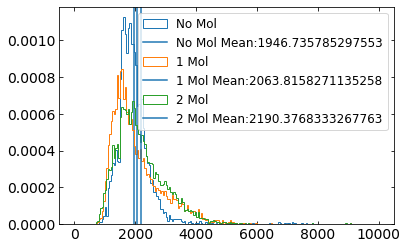

In [8]:
_density = True

plt.hist(int_arr_smol_noSmol, range=(0, 10000), bins=200, density=_density, histtype='step', label='No Mol');
plt.axvline(int_arr_smol_noSmol.mean(), label='No Mol Mean:'+str(int_arr_smol_noSmol.mean()))

plt.hist(int_arr_smol_1Mol, range=(0, 10000), bins=200, density=_density, histtype='step', label='1 Mol');
plt.axvline(int_arr_smol_1Mol.mean(), label='1 Mol Mean:'+str(int_arr_smol_1Mol.mean()))

plt.hist(int_arr_smol_2Mol, range=(0, 10000), bins=200, density=_density, histtype='step', label='2 Mol');
plt.axvline(int_arr_smol_2Mol.mean(), label='2 Mol Mean:'+str(int_arr_smol_2Mol.mean()))

plt.legend()

No of 2step files: 21,
No of 1step files: 11,
No of 0step files: 8,
        


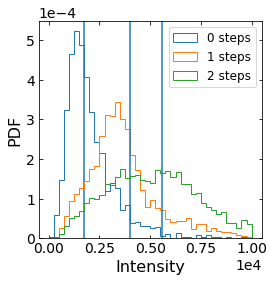

In [16]:
# https://stackoverflow.com/questions/35990467/fit-mixture-of-two-gaussian-normal-distributions-to-a-histogram-from-one-set-of
fig, ax = plt.subplots(figsize=(4,4))

data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\Eugene'

# data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data'

filelist_0step = get_file_list(data_dir, extension=("_inttrace.csv"), contains='0stepbleaching_trace')
filelist_1step = get_file_list(data_dir, extension=("_inttrace.csv"), contains='1stepbleaching_trace')
filelist_2step = get_file_list(data_dir, extension=("_inttrace.csv"), contains='2stepbleaching_trace')
print(f'No of 2step files: {len(filelist_2step)},\n\
No of 1step files: {len(filelist_1step)},\n\
No of 0step files: {len(filelist_0step)},\n\
        ')
_density = True

int_arr_smol = np.array([])
for filecsv in filelist_0step:
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values[:200]
    int_arr_smol = np.append(int_arr_smol, int_smol)
plt.hist(int_arr_smol, range=(0, 10000), bins=40, density=_density, histtype='step', label='0 steps')
plt.axvline(np.median(int_arr_smol))

int_arr_smol = np.array([])
for filecsv in filelist_1step:
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values[:500]
    int_arr_smol = np.append(int_arr_smol, int_smol)
plt.hist(int_arr_smol, range=(0, 10000), bins=40, density=_density, histtype='step', label='1 steps')
plt.axvline(np.mean(int_arr_smol))

int_arr_smol = np.array([])
for filecsv in filelist_2step:
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values[:200]
    int_arr_smol = np.append(int_arr_smol, int_smol)
plt.hist(int_arr_smol, range=(0, 10000), bins=40, density=_density, histtype='step', label='2 steps');
plt.axvline(np.mean(int_arr_smol))

ax.ticklabel_format(axis='both', style='sci', scilimits=(-1,4))

plt.xlabel('Intensity')
plt.ylabel('PDF')
plt.legend();

plt.savefig(os.path.join(save_dir, 'intensity_histogram_Loops.svg'))

## 1 and 2 bleaching together:  full trace

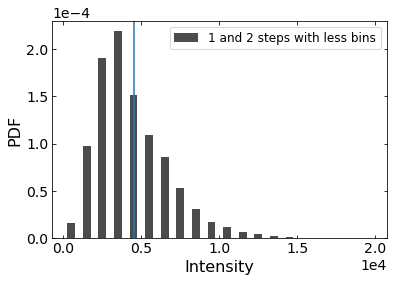

In [10]:
fig, ax = plt.subplots()

data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\Eugene'

# data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data'

# filelist_all = get_file_list(data_dir, extension=("_inttrace.csv"))
filelist_1step = get_file_list(data_dir, extension=("_inttrace.csv"), contains='1stepbleaching_trace')
filelist_2step = get_file_list(data_dir, extension=("_inttrace.csv"), contains='2stepbleaching_trace')
_density = True

int_arr_smol = np.array([])
for filecsv in filelist_1step:
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values#[:100]
    int_arr_smol = np.append(int_arr_smol, int_smol)
int_arr_smol_1mol = int_arr_smol


int_arr_smol = np.array([])
for filecsv in filelist_2step:
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values#[:100]
    int_arr_smol = np.append(int_arr_smol, int_smol)
int_arr_smol_2mol = int_arr_smol

int_arr_smol_all = np.append(int_arr_smol_1mol, int_arr_smol_2mol)
plt.hist(int_arr_smol_all, range=(0, 20000), bins=20, density=_density,
        histtype='bar', color='k', alpha=0.7, rwidth=0.5, label='1 and 2 steps with less bins');
plt.axvline(np.mean(int_arr_smol_all))

ax.ticklabel_format(axis='both', style='sci', scilimits=(-1,4))

plt.xlabel('Intensity')
plt.ylabel('PDF')
plt.legend();

plt.savefig(os.path.join(save_dir, 'intensity_histogram_Loops_all.svg'))

No of NonLoop files: 19,
No of Background files: 5,
        


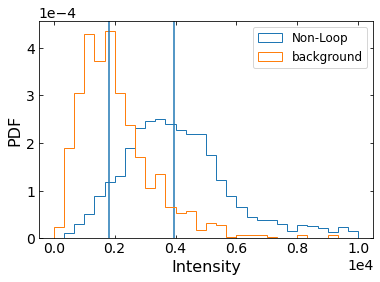

In [11]:
fig, ax = plt.subplots()

data_dir = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\Eugene'
filelist_NonLoop = get_file_list(data_dir, extension=("_inttrace.csv"), contains='NonLoops_trace')
filelist_NonLoop_bkg = get_file_list(data_dir, extension=("_inttrace.csv"), contains='NonLoops_background_trace')
print(f'No of NonLoop files: {len(filelist_NonLoop)},\n\
No of Background files: {len(filelist_NonLoop_bkg)},\n\
        ')

_density = True

int_arr_smol = np.array([])
for filecsv in filelist_NonLoop:# imp to change
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values[:200]
    int_arr_smol = np.append(int_arr_smol, int_smol)
plt.hist(int_arr_smol, range=(0, 10000), bins=30, density=_density, histtype='step', label='Non-Loop')
plt.axvline(np.median(int_arr_smol))

int_arr_smol = np.array([])
for filecsv in filelist_NonLoop_bkg:#imp to change
    df = pd.read_csv(filecsv)
    int_smol = df['smol'].values[:200]
    int_arr_smol = np.append(int_arr_smol, int_smol)
plt.hist(int_arr_smol, range=(0, 10000), bins=30, density=_density, histtype='step', label='background')
plt.axvline(np.median(int_arr_smol))

ax.ticklabel_format(axis='both', style='sci', scilimits=(-1,4))

plt.xlabel('Intensity')
plt.ylabel('PDF')
plt.legend();
plt.savefig(os.path.join(save_dir, 'intensity_histogram_NonLoops.svg'))

## time trace

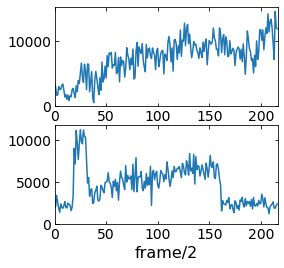

In [12]:
filecsv = r'\\cifs1.bpcentral.biophys.mpg.de\msdata\kimlab\SMC56LoopingProject\data\Selected_molecules\2bleaching_step\loop (12)_inttrace.csv'
df = pd.read_csv(filecsv)

figure = plt.figure(figsize=(4, 4))
nrows = 2
ncols = 1
ax00 = plt.subplot2grid((nrows, ncols), (0, 0), fig=figure)
ax10 = plt.subplot2grid((nrows, ncols), (1, 0), fig=figure, sharex=ax00)

# ax00.plot(df['smol'])
# ax00.plot(df.rolling(10).mean()['smol'])

n = 2 # the number of rows
ax00.plot(df.groupby(np.arange(len(df))//n).mean()['dna'])
ax10.plot(df.groupby(np.arange(len(df))//n).mean()['smol'])
ax00.set_xlim(0, len(df)/n)
ax00.set_ylim(0, None)
ax10.set_ylim(0, None)
plt.xlabel(f"frame/{n}")
plt.savefig(filecsv[:-3]+'svg')